# Distribution and Outlier Detection

##  Objective

### The key statistical concepts that will be explored this notebook are:

- Confidence Interval
- Outliers detection using standard deviation approach
- Outliers detection using box plot approach

### Problem Description

A retain chain ABC want to understand the distribution of demographics of customers to design and run few promotional campaigns. One of the demograhic attribute is age. To understand what age of customers mostly buy the its stores, it runs a survey and collects age of hunderds of customers randomly.

1. How to find out most of the customers are from which age group?
2. How many different campaigns might be required to be designed?
3. Are there any unusual behavior observed? (i.e. customers with different age groups rarely expected are visisting the stores)

### Dataset

We will use customer demographics data (only age)

- customer_age_abc.csv

In [1]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

## Age distribution of company ABC

In [2]:
# import os
# os.getcwd()

In [3]:
age_abc_df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/MLCourseV1/main/Session_1/customer_age_abc.csv")

In [4]:
# age_abc_df = pd.read_csv("/Users/vikrantdhawan/Dropbox/My Mac (Vikrant’s MacBook Air)/Downloads/Data Science Interviews/ManuRanjan's Pynbs/customer_age_abc.csv")

In [6]:
age_abc_df.sample(5)

,age
53,37
15,37
67,39
13,37
59,35


### Find min and max values

In [7]:
age_abc_df.age.min(), age_abc_df.age.max()

(31, 47)

### Histogram  and Density Plots

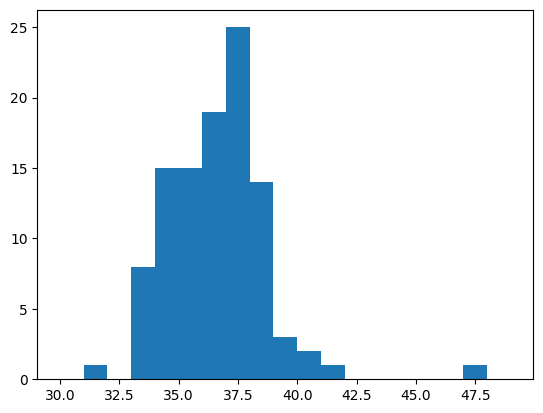

In [5]:
plt.hist(age_abc_df.age, bins = range(30, 50, 1));

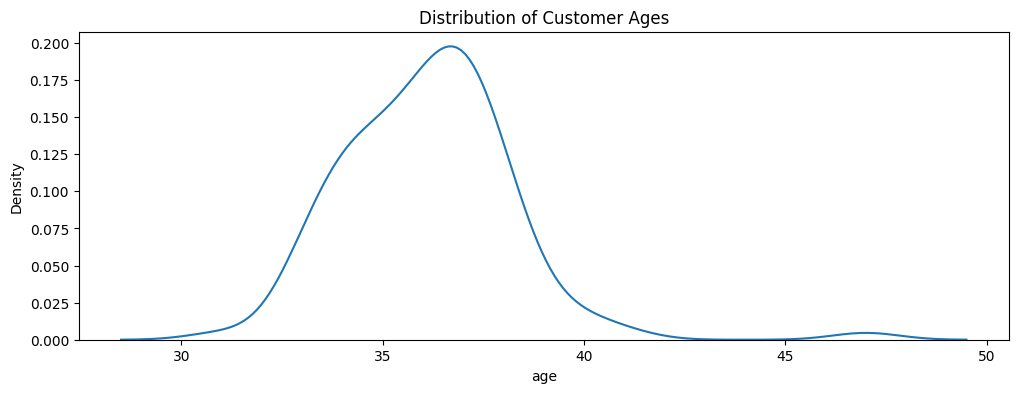

In [6]:
plt.figure(figsize = (12, 4))
plt.title("Distribution of Customer Ages")
sn.kdeplot(age_abc_df.age);

### Finding Confidence Interval and Outliers

- 95% of customers are from which age span?
- Are there any outliers?

In [7]:
age_abc_df.age.mean(), age_abc_df.age.std()

(36.11538461538461, 2.1055068449035668)

In [8]:
from scipy import stats

In [9]:
abc_ci_95 = stats.norm.interval(0.95,
                                loc=age_abc_df.age.mean(),
                                scale=age_abc_df.age.std())

In [10]:
abc_ci_95

(31.98866703017106, 40.24210220059817)

In [11]:
abc_ci_99_7 = stats.norm.interval(0.997,
                                loc=age_abc_df.age.mean(),
                                scale=age_abc_df.age.std())

In [12]:
abc_ci_99_7

(29.866792099697577, 42.36397713107162)

#### Are there any outliers

In [13]:
age_abc_df[age_abc_df.age > abc_ci_99_7[1]]

,age
102,47


## Age distribution of company XYZ

Let's look at a different scenario where the distribution looks very different.

### Dataset

We will use customer demographics data (only age)

- customer_age_abc.csv

In [8]:
age_xyz_df = pd.read_csv("https://raw.githubusercontent.com/manaranjanp/MLCourseV1/main/Session_1/customer_age_xyz.csv")

In [9]:
age_xyz_df.sample(10)

,age
0,32
19,32
67,35
25,54
102,54
40,38
16,33
26,28
58,32
93,36


### Histogram and Density Plots

In [10]:
age_xyz_df.age.min(), age_xyz_df.age.max()

(24, 61)

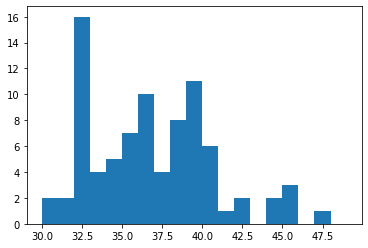

In [11]:
plt.hist(age_xyz_df.age, bins = range(30, 50, 1));

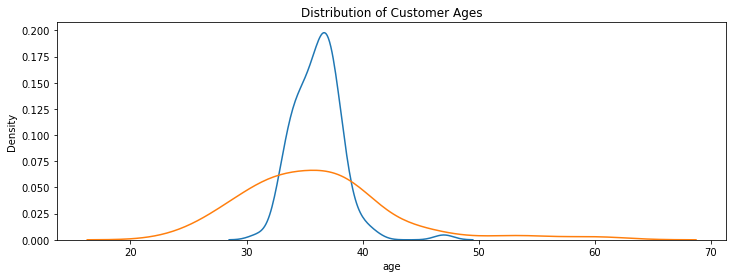

In [12]:
plt.figure(figsize = (12, 4))
plt.title("Distribution of Customer Ages")
sn.kdeplot(age_abc_df.age, label = 'ABC');
sn.kdeplot(age_xyz_df.age, label = 'XYZ');

### Finding Confidence Interval and Outliers

In [14]:
age_xyz_df.age.mean(), age_xyz_df.age.std()

(35.99047619047619, 6.527302479254172)

In [15]:
from scipy import stats

In [16]:
xyz_ci_95 = stats.norm.interval(0.95,
                                loc=age_xyz_df.age.mean(),
                                scale=age_xyz_df.age.std())

In [17]:
xyz_ci_95

(23.197198414939006, 48.783753966013364)

In [18]:
xyz_ci_99_7 = stats.norm.interval(0.997,
                                loc=age_xyz_df.age.mean(),
                                scale=age_xyz_df.age.std())

In [19]:
xyz_ci_99_7

(16.619153072616133, 55.36179930833617)

In [20]:
age_xyz_df[age_xyz_df.age > xyz_ci_99_7[1]]

,age
103,61
104,59


### Note:

- Are there any problem with finding outliers using 3 standard deviation approch?
- This is approach is not very robust as the mean and standard deviations are very sensitive to outliers.


## Finding outliers using Box Plot

- A boxplot displays the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

- It can find outliers and what their values are. It can also tell if the data is symmetrical, how tightly the data is grouped, and if the data is skewed.

- The minimum or lowest value of the dataset


Source: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

<img src="https://github.com/manaranjanp/MLCourseV1/blob/main/Session_1/box.png?raw=1" alt="Nowmal Distribution" width="500"/>

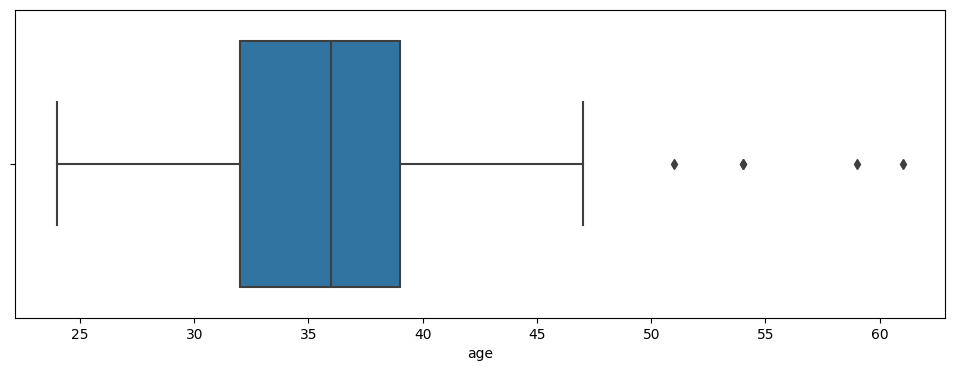

In [26]:
plt.figure(figsize=(12,4))
sn.boxplot(x = age_xyz_df.age, orient = 'h' );

#### Finding median, IQR, min and max values

The range is that is less sensitive to outliers is the interquartile range. The interquartile range is calculated by subtracting the first quartile from the third quartile:

**IQR = Q3 – Q1**

Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:


- Calculate the interquartile range for the data.
- Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
- Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
- Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

Source: https://www.thoughtco.com/what-is-the-interquartile-range-rule-3126244

In [21]:
age_xyz_df.age.median()

36.0

In [22]:
age_stats = age_xyz_df.age.describe()
age_stats

count    105.000000
mean      35.990476
std        6.527302
min       24.000000
25%       32.000000
50%       36.000000
75%       39.000000
max       61.000000
Name: age, dtype: float64

In [23]:
from scipy import stats

In [24]:
iqr = stats.iqr(age_xyz_df.age)
iqr

7.0

In [25]:
min_age = age_stats['25%'] - 1.5 * iqr
max_age = age_stats['75%'] + 1.5 * iqr

In [26]:
min_age, max_age

(21.5, 49.5)

### Any outliers

In [27]:
age_xyz_df[age_xyz_df.age > max_age]

,age
25,54
34,51
102,54
103,61
104,59
